In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

In [97]:
df = pd.read_excel('../Data_RLMS.xlsx')
df.head()

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [98]:
renamed_variables = {
    "psu": "region",
    "status": "city_type",
    "male": "is_male",
    "lnwage": "log_wage",
    "public": "is_gov",
    "children": "num_children",
    "educ": "education_level",
    "urban": "is_urban"
}

In [99]:
dfr = pd.read_csv('../renamed_dataset.csv')
dfr.drop(columns=['Unnamed: 0'], inplace=True)
dfr

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,0,1,0,0,0,0,0,0,0,1
3867,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,0,0,0,1,0,0,0,0,0,0
3868,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3869,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
cols_to_add = ['idind', 'vj1.1.2', 'vj1.1.3', 'vj1.1.4', 'vj62', 'vj63', 'vj64', 'vm80.0', 'vm80', 'vj72.6h2', 'vj72.6h', 'vj72.5h4', 'vj72.5h3', 'vj72.5h2', 'vj72.5h', 'vj72.4h2', 'vj72.4h', 'vj72.3h2', 'vj72.3h', 'vj72.2h2', 'vj72.2h']

In [101]:
df_full = pd.read_spss('../full_dataset_2017.sav')
df_full = df_full[cols_to_add]
df_full

,idind,vj1.1.2,vj1.1.3,vj1.1.4,vj62,vj63,vj64,vm80.0,vm80,vj72.6h2,...,vj72.5h4,vj72.5h3,vj72.5h2,vj72.5h,vj72.4h2,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h
0,3.0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ УДОВЛЕТВОРЕНЫ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,5.0,5.0,6.0,"Нет, никогда не употребляете",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да
1,7.0,NaN,NaN,NaN,3.0,2.0,6.0,"Да, употребляете",Да,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,NaN,NaN,NaN,3.0,3.0,6.0,"Да, употребляете",Да,NaN,...,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN
3,37.0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,"И ДА, И НЕТ",СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,3.0,2.0,5.0,"Да, употребляете",Да,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ,СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ,4.0,3.0,6.0,"Да, употребляете",Нет,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,57089.0,NaN,NaN,NaN,2.0,3.0,6.0,"Нет, никогда не употребляете",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12437,57090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12438,57092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12439,57093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_full["idind"] = df_full["idind"].astype(int)
df_merged = pd.merge(dfr, df_full, on='idind', how='inner')
df_merged

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,vj72.5h4,vj72.5h3,vj72.5h2,vj72.5h,vj72.4h2,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да
3865,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN
3866,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN
3867,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,NaN,NaN,NaN,Нет,NaN,Да,NaN,NaN,NaN,NaN


In [103]:
renamed_variables_v2 = {
    "psu": "region",
    "status": "city_type",
    "male": "is_male",
    "lnwage": "log_wage",
    "public": "is_gov",
    "children": "num_children",
    "educ": "education_level",
    "urban": "is_urban",
    "vj1.1.2": "job_satisfaction",
    "vj1.1.3": "job_salary_satisfaction",
    "vj1.1.4": "career_oportunities_satisfaction",
    "vj62": "money_ladder",
    "vj63": "power_ladder",
    "vj64": "respect_ladder",
    "vm80.0": "do_you_consume_alcohol",
    "vm80": "did_you_drink_alcohol_in_last_30_days"
}

In [104]:
len(renamed_variables_v2)

16

In [105]:
df_merged.rename(columns=renamed_variables_v2, inplace=True)
df_merged.head()

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,vj72.5h4,vj72.5h3,vj72.5h2,vj72.5h,vj72.4h2,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
s = """vj72.6h2
vj72.6h
vj72.5h4
vj72.5h3
vj72.5h2
vj72.5h
vj72.4h2
vj72.4h
vj72.3h2
vj72.3h
vj72.2h2
vj72.2h""".split('\n')
print(s)

['vj72.6h2', 'vj72.6h', 'vj72.5h4', 'vj72.5h3', 'vj72.5h2', 'vj72.5h', 'vj72.4h2', 'vj72.4h', 'vj72.3h2', 'vj72.3h', 'vj72.2h2', 'vj72.2h']


In [107]:
len(df_merged) - df_merged.isna().sum()

idind        3869
region       3869
city_type    3869
age          3869
is_male      3869
             ... 
vj72.4h      1378
vj72.3h2       16
vj72.3h       775
vj72.2h2        3
vj72.2h       214
Length: 107, dtype: int64

In [108]:
df_merged['vj72.4h'].value_counts()

vj72.4h
Да                      1172
Нет                      200
НЕТ ОТВЕТА                 6
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ       0
ОТКАЗ ОТ ОТВЕТА            0
Name: count, dtype: int64

In [109]:
df_merged.education_level.value_counts()

education_level
3    1382
1    1103
2    1063
0     321
Name: count, dtype: int64

In [110]:
ls = df_merged[df_merged.education_level == 3][['vj72.5h4', 'vj72.5h3', 'vj72.5h2', 'vj72.5h']]
newl = ls['vj72.5h'].isna().astype(int) + ls['vj72.5h2'].isna() + ls['vj72.5h3'].isna() + ls['vj72.5h4'].isna()
newl

1       2
4       3
5       3
7       2
10      3
       ..
3856    3
3857    3
3859    3
3860    3
3866    3
Length: 1382, dtype: int64

In [111]:
df_merged.to_csv('../df_extended_v2.csv')

In [112]:
df_merged

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,vj72.5h4,vj72.5h3,vj72.5h2,vj72.5h,vj72.4h2,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да
3865,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN
3866,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN
3867,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,NaN,NaN,NaN,Нет,NaN,Да,NaN,NaN,NaN,NaN


In [128]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3869 entries, 0 to 3868
Columns: 107 entries, idind to vj72.2h
dtypes: category(20), float64(1), int64(83), object(3)
memory usage: 2.6+ MB


In [133]:
for i in dfr['idind']:
    if (len(df_merged[df_merged['idind'] == i]) == 0):
        print(i)

43605
55936


In [131]:
df_merged

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,vj72.5h4,vj72.5h3,vj72.5h2,vj72.5h,vj72.4h2,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да
3865,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN
3866,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN
3867,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,NaN,NaN,NaN,Нет,NaN,Да,NaN,NaN,NaN,NaN


In [132]:
dfr

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,0,1,0,0,0,0,0,0,0,1
3867,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,0,0,0,1,0,0,0,0,0,0
3868,56986,Московская о,Село,32,1,"ЛЕГКАЯ, ПИЩЕ",11.362930,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3869,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
dfr[dfr['idind'] == 55936].iloc[0].head(20)

idind                     55936
region             Бийск и Бийс
city_type                 Город
age                          27
is_male                       1
industry           НЕФТЕГАЗОВАЯ
log_wage               9.530344
is_gov                        1
internet                      1
num_children                  4
is_urban                      1
education_level               1
id1                           0
id2                           0
id3                           0
id4                           0
id5                           0
id6                           0
id7                           0
id8                           0
Name: 3620, dtype: object

In [151]:
2.718281828459045 ** 9.530344

13771.327605973474

In [145]:
dfr['region'].value_counts(
)

region
г. Москва       315
Московская о    203
Батайск: Рос    160
Кущевский р-    144
г. Санкт-Пет    134
Липецк: Липе    125
Усинск и Уси    124
Глазов и Гла    109
Сыктывкар: Р    108
Саратов: Сар    106
Соликамск и     104
Казань: Респ    102
Георгиевск и    102
Уварово и Ув    101
Челябинск: Ч    101
Орск: Оренбу    100
Краснодар: К     98
Нижний Новго     97
Бийск и Бийс     92
Курган: Кург     91
Тюменская об     88
Красноармейс     87
Томск: Томск     85
Вольск и Вол     85
Тула: Тульск     84
Владивосток:     82
Назарово и Н     81
Шумерля и Шу     80
Куйбышевский     80
Волосовский      76
Ржев и Ржевс     76
Земетчинский     75
Тамбовский р     74
Красноярск:      74
Руднянский р     70
Курьинский р     65
Смоленск: См     51
Залукокоаже      42
Name: count, dtype: int64

In [148]:
dfr[dfr['idind'] == 43605].iloc[0][dfr[dfr['idind'] == 43605].iloc[0] != 0]

idind                     43605
region                г. Москва
city_type          Областной це
age                          28
industry           ОРГАНЫ УПРАВ
log_wage                9.97663
is_gov                        1
internet                      1
is_urban                      1
education_level               3
id2                           1
id39                          1
id40                          1
id55                          1
id70                          1
Name: 2404, dtype: object

In [140]:
from math import e
e ** 9.97663

21517.675658319782

In [144]:
dfr[(dfr['industry'] == 'ОРГАНЫ УПРАВ') & (dfr['is_male'] == 0) & (dfr['region'] == 'г. Москва')]

,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,num_children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
2396,43450,г. Москва,Областной це,47,0,ОРГАНЫ УПРАВ,10.01969,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2404,43605,г. Москва,Областной це,28,0,ОРГАНЫ УПРАВ,9.97663,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2414,43683,г. Москва,Областной це,41,0,ОРГАНЫ УПРАВ,8.95498,1,1,2,...,0,0,0,0,1,0,0,0,0,0
3062,50059,г. Москва,Областной це,37,0,ОРГАНЫ УПРАВ,10.85210,1,1,2,...,0,0,0,0,1,0,0,0,0,0
3393,52446,г. Москва,Областной це,32,0,ОРГАНЫ УПРАВ,9.97663,1,1,2,...,0,0,0,0,1,0,0,0,0,0


In [153]:
dfr['absolute_wage'] = e ** dfr['log_wage']

In [150]:
dfr[dfr['idind'] == 55936].iloc[0][dfr[dfr['idind'] == 55936].iloc[0] != 0]

idind                     55936
region             Бийск и Бийс
city_type                 Город
age                          27
is_male                       1
industry           НЕФТЕГАЗОВАЯ
log_wage               9.530344
is_gov                        1
internet                      1
num_children                  4
is_urban                      1
education_level               1
id33                          1
id45                          1
id50                          1
id64                          1
id71                          1
id73                          1
Name: 3620, dtype: object

<Axes: >

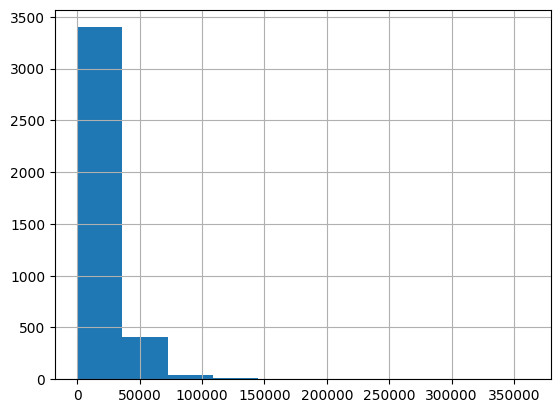

In [155]:
dfr['absolute_wage'].hist()

In [ ]:
sns.histplot(dfr[''])